In [6]:
import pandas as pd
import statsmodels.api as sm

# 1.) Import Data from FRED

In [7]:
data = pd.read_csv("TaylorRuleData 1.csv", index_col = 0)

In [8]:
data.index = pd.to_datetime(data.index)

In [21]:
data=data.dropna()

# 2.) Do Not Randomize, split your data into Train, Test Holdout

In [32]:
split_1 = int(len(data) * .6)
split_2 = int(len(data) * .9)
data_in = data[:split_1]
data_out = data[split_1:split_2]
data_hold = data[split_2:]

In [34]:
X_in = data_in.iloc[:,1:]
y_in = data_in.iloc[:,0]
X_out = data_out.iloc[:,1:]
y_out = data_out.iloc[:,0]
X_hold = data_hold.iloc[:,1:]
y_hold = data_hold.iloc[:,0]

In [35]:
# Add Constants
X_in = sm.add_constant(X_in)
X_out = sm.add_constant(X_out)
X_hold = sm.add_constant(X_hold)

# 3.) Build a model that regresses FF~Unemp, HousingStarts, Inflation

In [36]:
model1 = sm.OLS(y_in, X_in).fit()

# 4.) Recreate the graph fro your model

In [37]:
import matplotlib.pyplot as plt

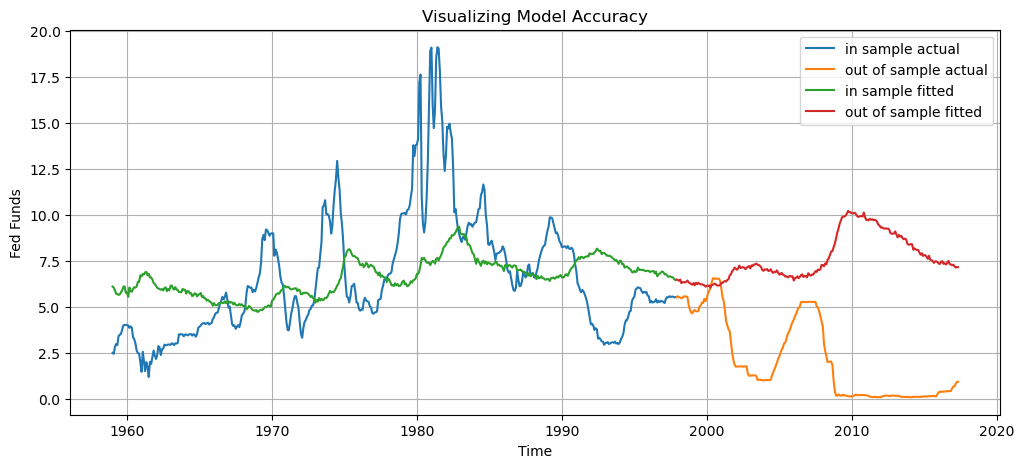

In [46]:
plt.figure(figsize = (12,5))

###
plt.plot(y_in)
plt.plot(y_out)
plt.plot(model1.predict(X_in))
plt.plot(model1.predict(X_out))
###

plt.ylabel("Fed Funds")
plt.xlabel("Time")
plt.title("Visualizing Model Accuracy")
plt.legend(['in sample actual','out of sample actual','in sample fitted','out of sample fitted'])
plt.grid()
plt.show()

## "All Models are wrong but some are useful" - 1976 George Box

# 5.) What are the in/out of sample MSEs

In [39]:
from sklearn.metrics import mean_squared_error

In [40]:
in_mse_1 = mean_squared_error(model1.predict(X_in),y_in)
out_mse_1 = mean_squared_error(model1.predict(X_out),y_out)

In [41]:
print("Insample MSE : ", in_mse_1)
print("Outsample MSE : ", out_mse_1)

Insample MSE :  10.071422013168643
Outsample MSE :  40.3608278356685


# 6.) Using a for loop. Repeat 3,4,5 for polynomial degrees 1,2,3

In [42]:
from sklearn.preprocessing import PolynomialFeatures

Degrees =  1


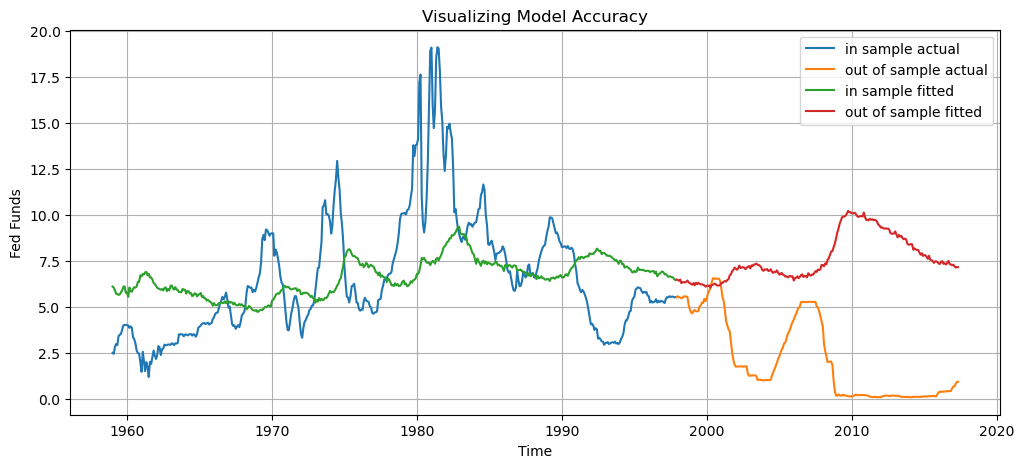

Insample MSE :  10.071422013168641
Outsample MSE :  40.36082783565204
Degrees =  2


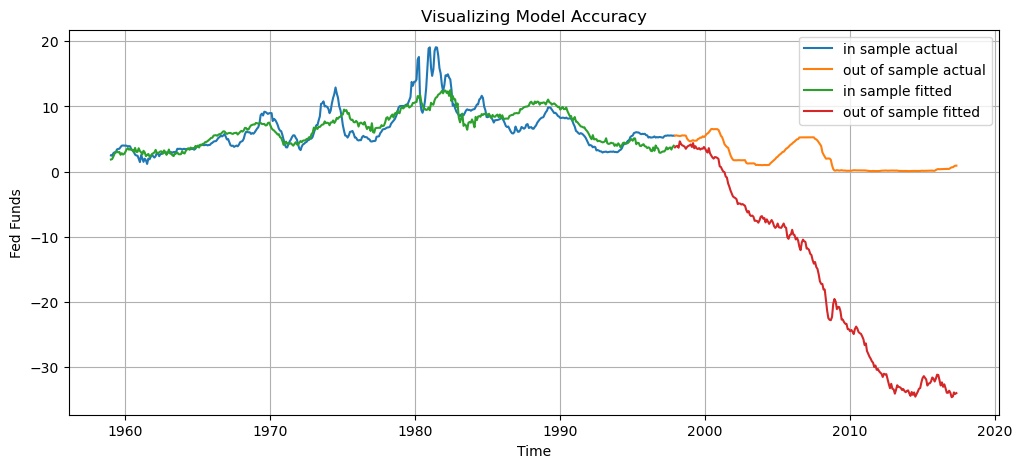

Insample MSE :  3.863477139276068
Outsample MSE :  481.4465099024405
Degrees =  3


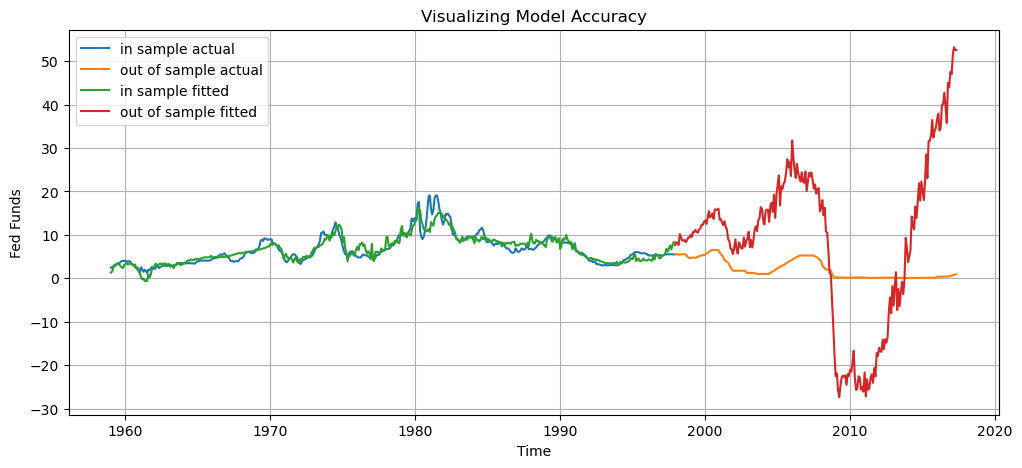

Insample MSE :  1.8723636288250916
Outsample MSE :  371.7672642959744


In [58]:
max_ranges = 3
for degrees in range(1, max_ranges + 1):
    print("Degrees = ", degrees)
    poly = PolynomialFeatures(degree = degrees)
    X_in_poly = poly.fit_transform(X_in)
    X_out_poly = poly.transform(X_out)

    model1 = sm.OLS(y_in, X_in_poly).fit()

    plt.figure(figsize = (12,5))

    #replace predict variable to index
    pred_in = model1.predict(X_in_poly)
    pred_in = pd.DataFrame(pred_in, index = y_in.index)
    
    pred_out = model1.predict(X_out_poly)
    pred_out = pd.DataFrame(pred_out, index = y_out.index)
    ###
    plt.plot(y_in)
    plt.plot(y_out)
    plt.plot(pred_in)
    plt.plot(pred_out)    ###

    plt.ylabel("Fed Funds")
    plt.xlabel("Time")
    plt.title("Visualizing Model Accuracy")
    plt.legend(['in sample actual','out of sample actual','in sample fitted','out of sample fitted'])
    plt.grid()
    plt.show()

    #print insample & outsample mse
    in_mse_1 = mean_squared_error(model1.predict(X_in_poly),y_in)
    out_mse_1 = mean_squared_error(model1.predict(X_out_poly),y_out)

    print("Insample MSE : ", in_mse_1)
    print("Outsample MSE : ", out_mse_1)

# 7.) State your observations :

The model becomes overfitted when additional degrees are added, resulting in the out-of-sample MSE increasing nearly tenfold. However, when the degree was increased from 2 to 3, there was only a tiny change in the MSE.